<a href="https://colab.research.google.com/github/kelvynlukito/DataFusion_Experiment_IoT_FusionSensor/blob/main/DataFusion_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DataFusion Experiment**
**1301200104**

---



# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math

# **Import Dataset / Data Record**

In [ ]:
path = '/content/DataFusion_Experiment 2023-04-13 22-35-58.xls'
df_gyro = pd.read_excel(path, sheet_name='Gyroscope')
df_accel = pd.read_excel(path, sheet_name='Linear Acceleration')

In [ ]:
df_gyro.head()

,Time (s),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s)
0,0.019902,-0.093462,-0.026878,-0.029932
1,0.025525,-0.093462,-0.026878,-0.029932
2,0.030462,-0.093462,-0.026878,-0.029932
3,0.035550,-0.093462,-0.026878,-0.029932
4,0.040471,-0.093462,-0.026878,-0.029932


In [ ]:
df_gyro.tail()

,Time (s),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s)
15222,76.130898,0.119119,0.018937,-0.070860
15223,76.135992,0.048869,0.072693,-0.067806
15224,76.140908,-0.019548,0.122784,-0.053145
15225,76.145950,-0.073304,0.158825,-0.034819
15226,76.150887,-0.095295,0.177151,-0.017715


In [ ]:
df_accel.head()

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,0.035462,0.003872,-0.009370,-0.005822
1,0.045471,-0.087962,-0.067298,0.001304
2,0.055451,-0.197651,-0.059694,-0.085383
3,0.065460,-0.084739,-0.047001,-0.089994
4,0.075470,-0.068112,-0.031089,-0.118817


In [ ]:
df_accel.tail()

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
7607,76.105900,0.427281,-0.273522,0.777043
7608,76.115879,0.351928,-0.034205,0.555408
7609,76.125889,0.514303,0.170221,-0.556612
7610,76.135899,-0.016147,0.285065,-1.333106
7611,76.145878,-0.338601,0.290305,-0.827590


In [ ]:
df_gyro.describe()

,Time (s),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s)
count,15227.000000,15227.000000,15227.000000,15227.000000
mean,38.085453,-0.071134,0.123050,0.021137
std,21.978768,0.493709,1.099450,1.674008
min,0.019902,-2.762944,-3.885103,-3.117856
25%,19.053063,-0.258396,-0.372628,-0.974025
50%,38.085572,-0.050702,-0.014661,-0.530231
75%,57.118017,0.170431,0.510072,0.398895
max,76.150887,1.893071,6.789767,5.569870


In [ ]:
df_accel.describe()

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
count,7612.000000,7612.000000,7612.000000,7612.000000
mean,38.090409,-0.554413,-0.056614,-0.027344
std,21.975159,2.791025,1.807816,1.966469
min,0.035462,-13.689133,-7.847246,-11.424026
25%,19.063007,-1.972207,-0.539861,-0.878582
50%,38.090505,-0.316433,0.016284,-0.010949
75%,57.117968,0.876105,0.705070,0.833526
max,76.145878,10.841825,10.275018,17.602360


In [ ]:
df_gyro.shape

(15227, 4)

In [ ]:
df_accel.shape

(7612, 4)

# **Visualize Dataset Acceleration**

# **Seperated Numerical Features Acceleration**

In [ ]:
#df_accel_num = df_accel.select_dtypes(include=np.number)
#df_accel_num.drop(['Time (s)'],axis=1)
df_accel_num = ['Linear Acceleration x (m/s^2)','Linear Acceleration y (m/s^2)','Linear Acceleration z (m/s^2)']

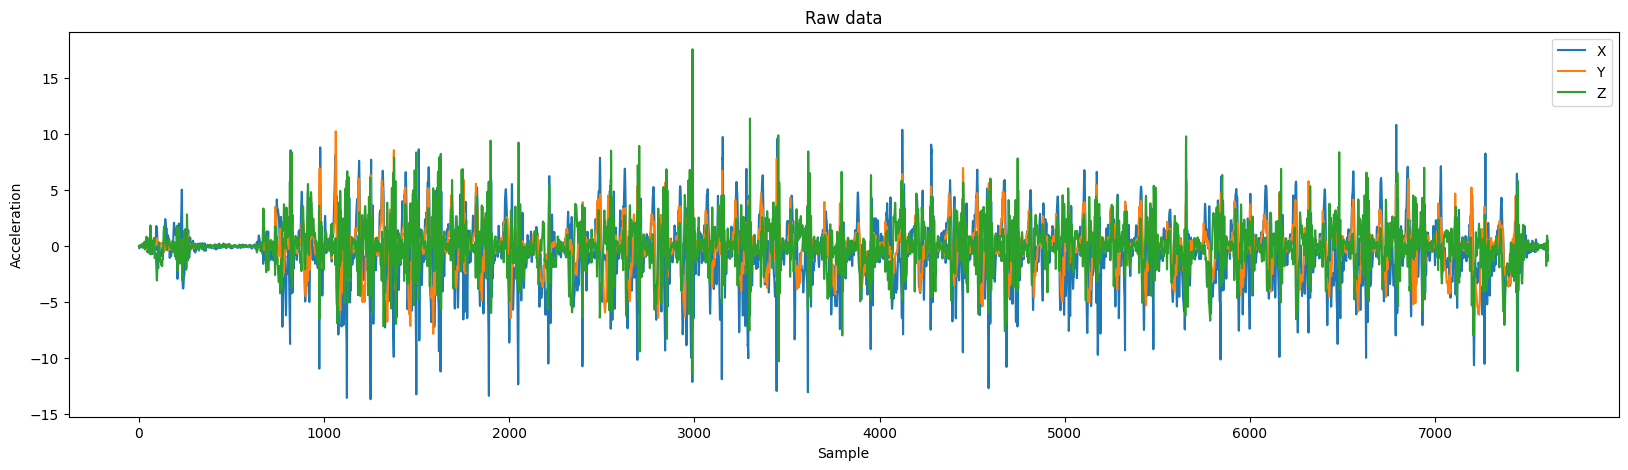

In [ ]:
# Plot raw data
plt.figure(figsize=(20, 5))
plt.plot(df_accel['Linear Acceleration x (m/s^2)'], label='X')
plt.plot(df_accel['Linear Acceleration y (m/s^2)'], label='Y')
plt.plot(df_accel['Linear Acceleration z (m/s^2)'], label='Z')
plt.title('Raw data')
plt.xlabel('Sample')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

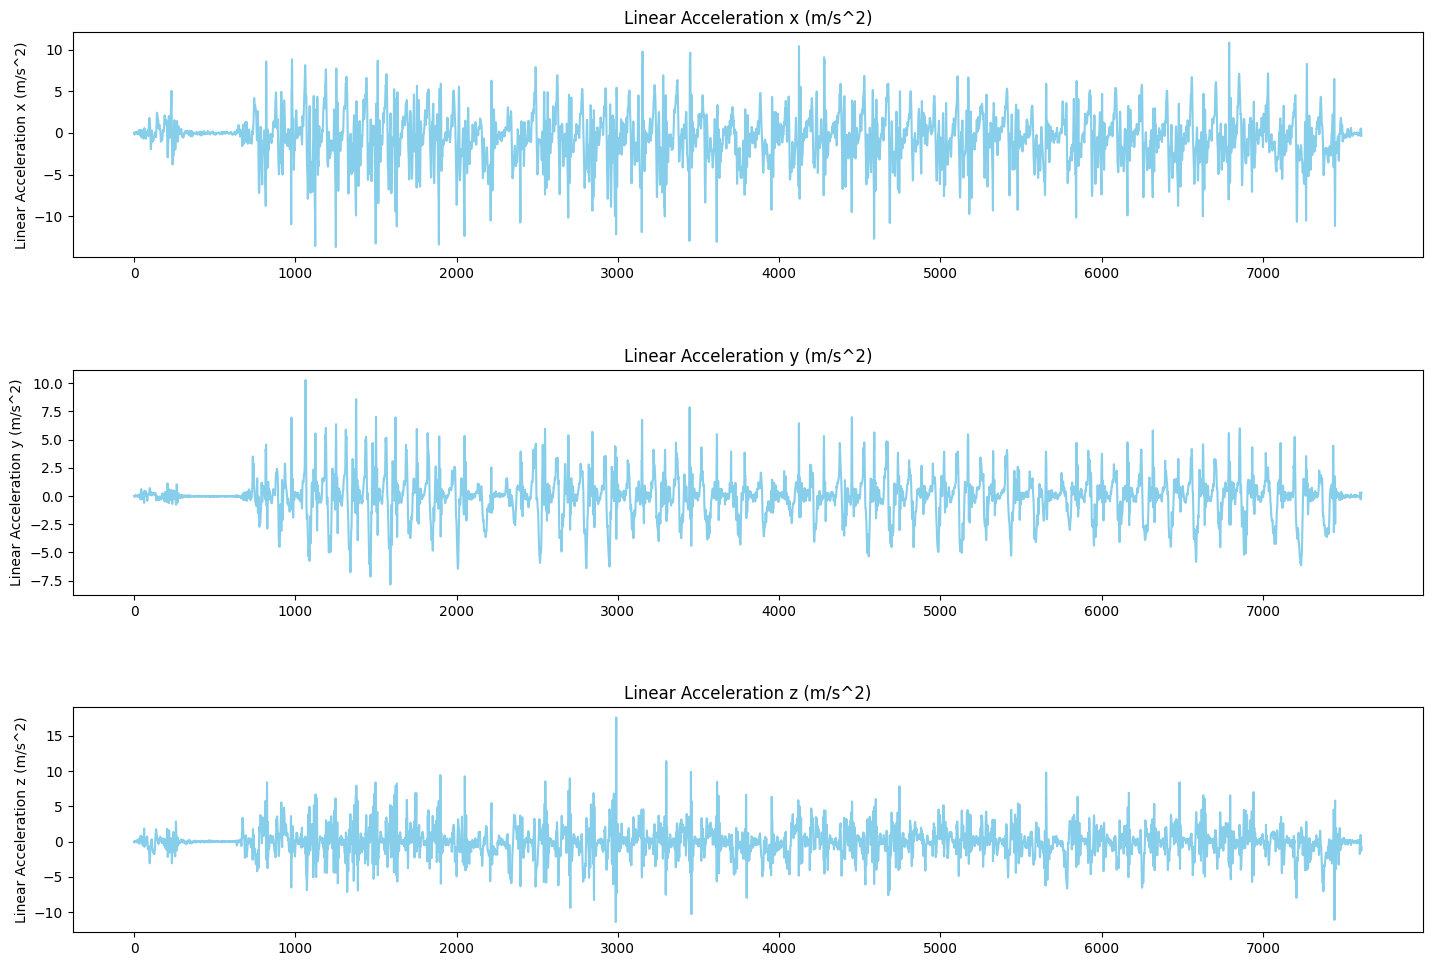

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15, 10)
for i in range(len(df_accel_num)):
  plt.subplot(3,1,i+1)
  sns.lineplot(df_accel[df_accel_num[i]], color='skyblue')
  plt.title(f'{df_accel_num[i]}')
  plt.subplots_adjust(left=0.1,
    bottom=0.1,
    right=1,
    top=1,
    wspace=0.1,
    hspace=0.5)
plt.show()   

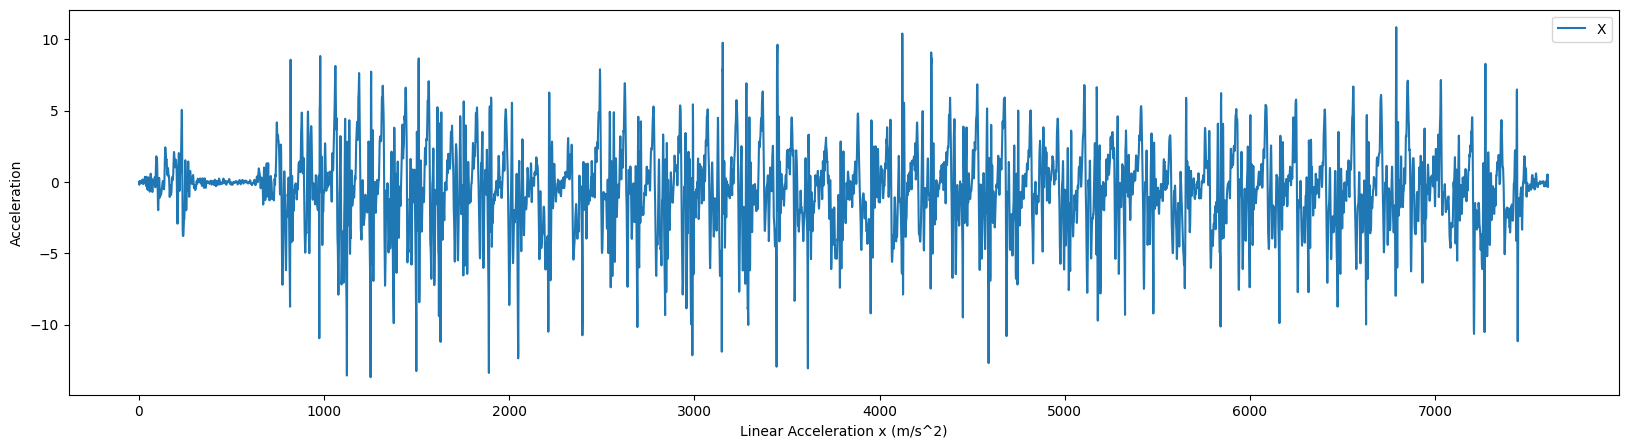

In [ ]:
# Plot raw data
plt.figure(figsize=(20, 5))
plt.plot(df_accel['Linear Acceleration x (m/s^2)'], label='X')
plt.xlabel('Linear Acceleration x (m/s^2)')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

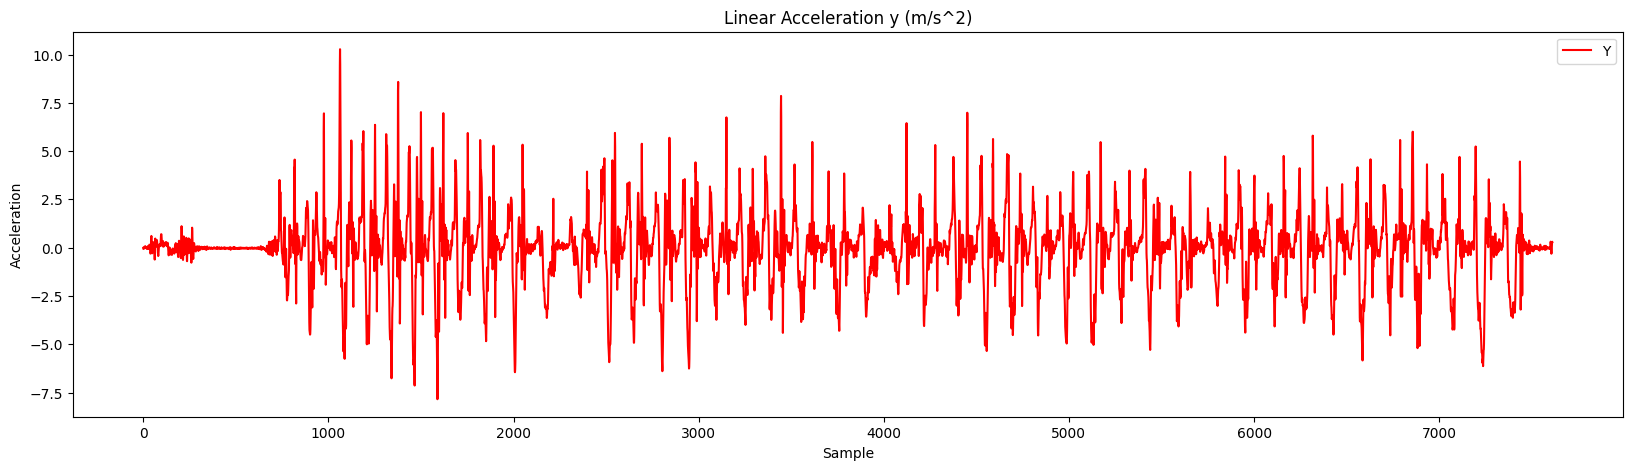

In [ ]:
# Plot raw data
plt.figure(figsize=(20, 5))
plt.plot(df_accel['Linear Acceleration y (m/s^2)'], label='Y', color='red')
plt.title('Linear Acceleration y (m/s^2)')
plt.xlabel('Sample')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

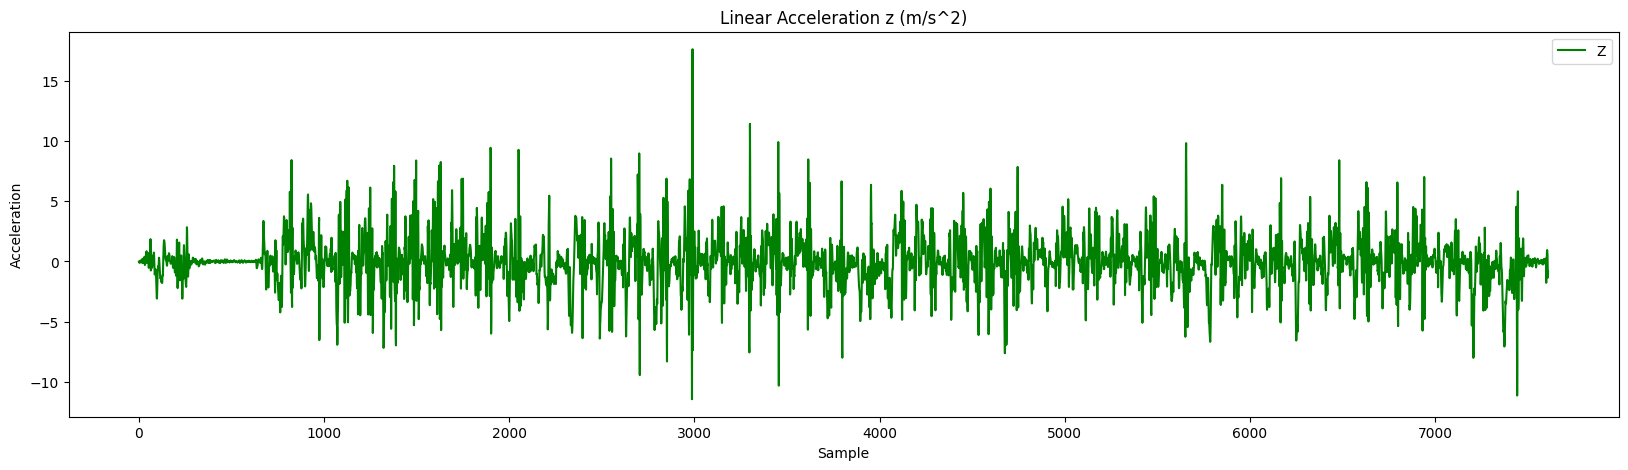

In [ ]:
# Plot raw data
plt.figure(figsize=(20, 5))
plt.plot(df_accel['Linear Acceleration z (m/s^2)'], label='Z', color='green')
plt.title('Linear Acceleration z (m/s^2)')
plt.xlabel('Sample')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

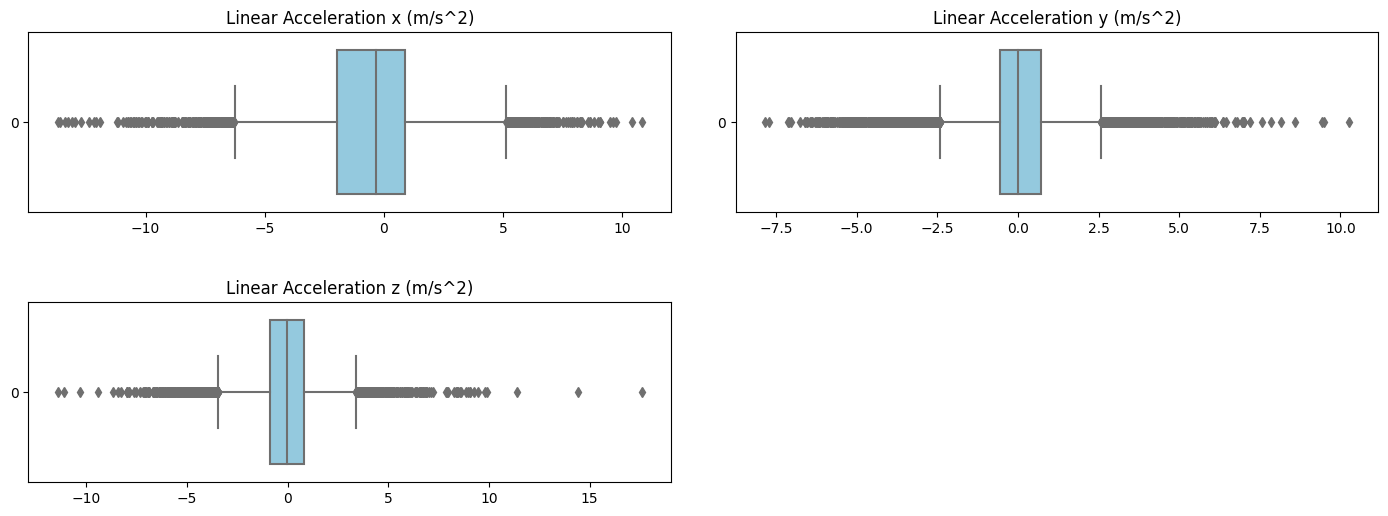

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15, 5)
for i in range(len(df_accel_num)):
  plt.subplot(2,2,i+1)
  sns.boxplot(df_accel[df_accel_num[i]], orient='h', color='skyblue')
  plt.title(f'{df_accel_num[i]}')
  plt.subplots_adjust(left=0.1,
    bottom=0.1,
    right=1,
    top=1,
    wspace=0.1,
    hspace=0.5)
plt.show()   

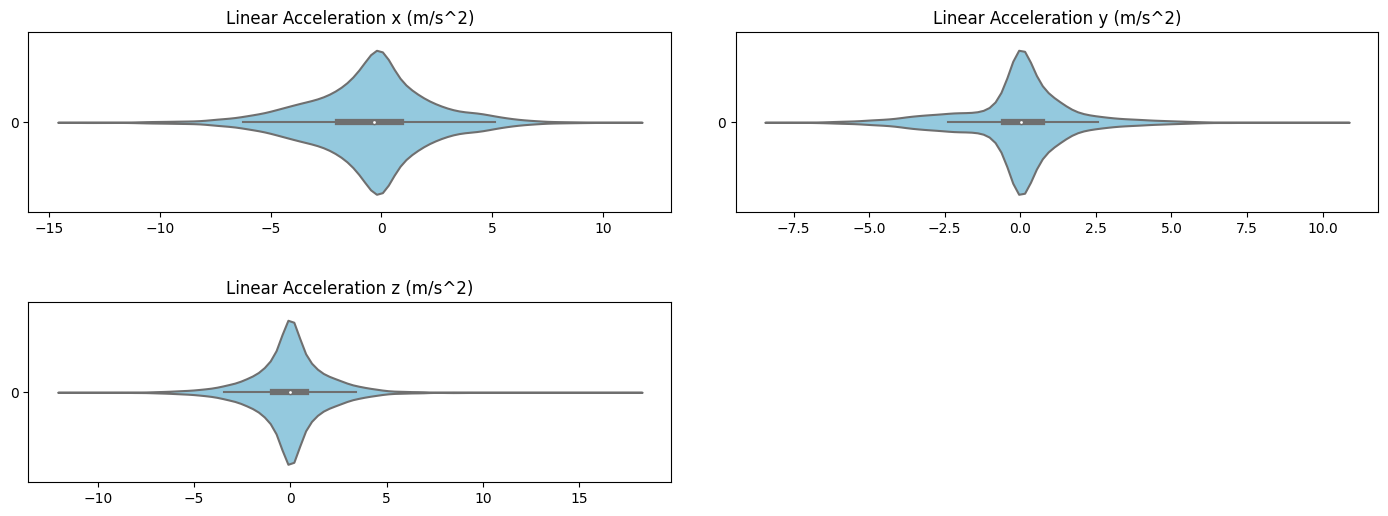

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15, 5)
for i in range(len(df_accel_num)):
  plt.subplot(2,2,i+1)
  sns.violinplot(df_accel[df_accel_num[i]], orient='h', color='skyblue')
  plt.title(f'{df_accel_num[i]}')
  plt.subplots_adjust(left=0.1,
    bottom=0.1,
    right=1,
    top=1,
    wspace=0.1,
    hspace=0.5)
plt.show()   

# **Visualize Dataset Gyroscope**

# **Seperated Numerical Features Acceleration**

In [ ]:
#df_gyro_num = df_gyro.select_dtypes(include=np.number)
#df_gyro_num.drop(['Time (s)'],axis=1)
df_gyro_num = ['Gyroscope x (rad/s)','Gyroscope y (rad/s)','Gyroscope z (rad/s)']

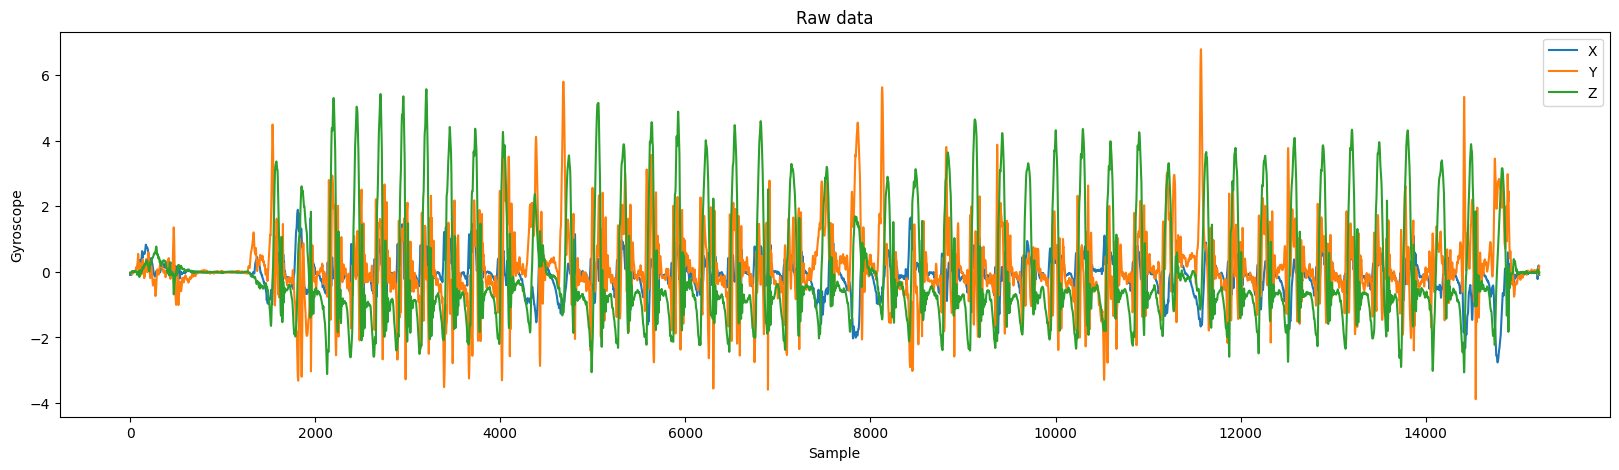

In [ ]:
# Plot raw data
plt.figure(figsize=(20, 5))
plt.plot(df_gyro['Gyroscope x (rad/s)'], label='X')
plt.plot(df_gyro['Gyroscope y (rad/s)'], label='Y')
plt.plot(df_gyro['Gyroscope z (rad/s)'], label='Z')
plt.title('Raw data')
plt.xlabel('Sample')
plt.ylabel('Gyroscope')
plt.legend()
plt.show()

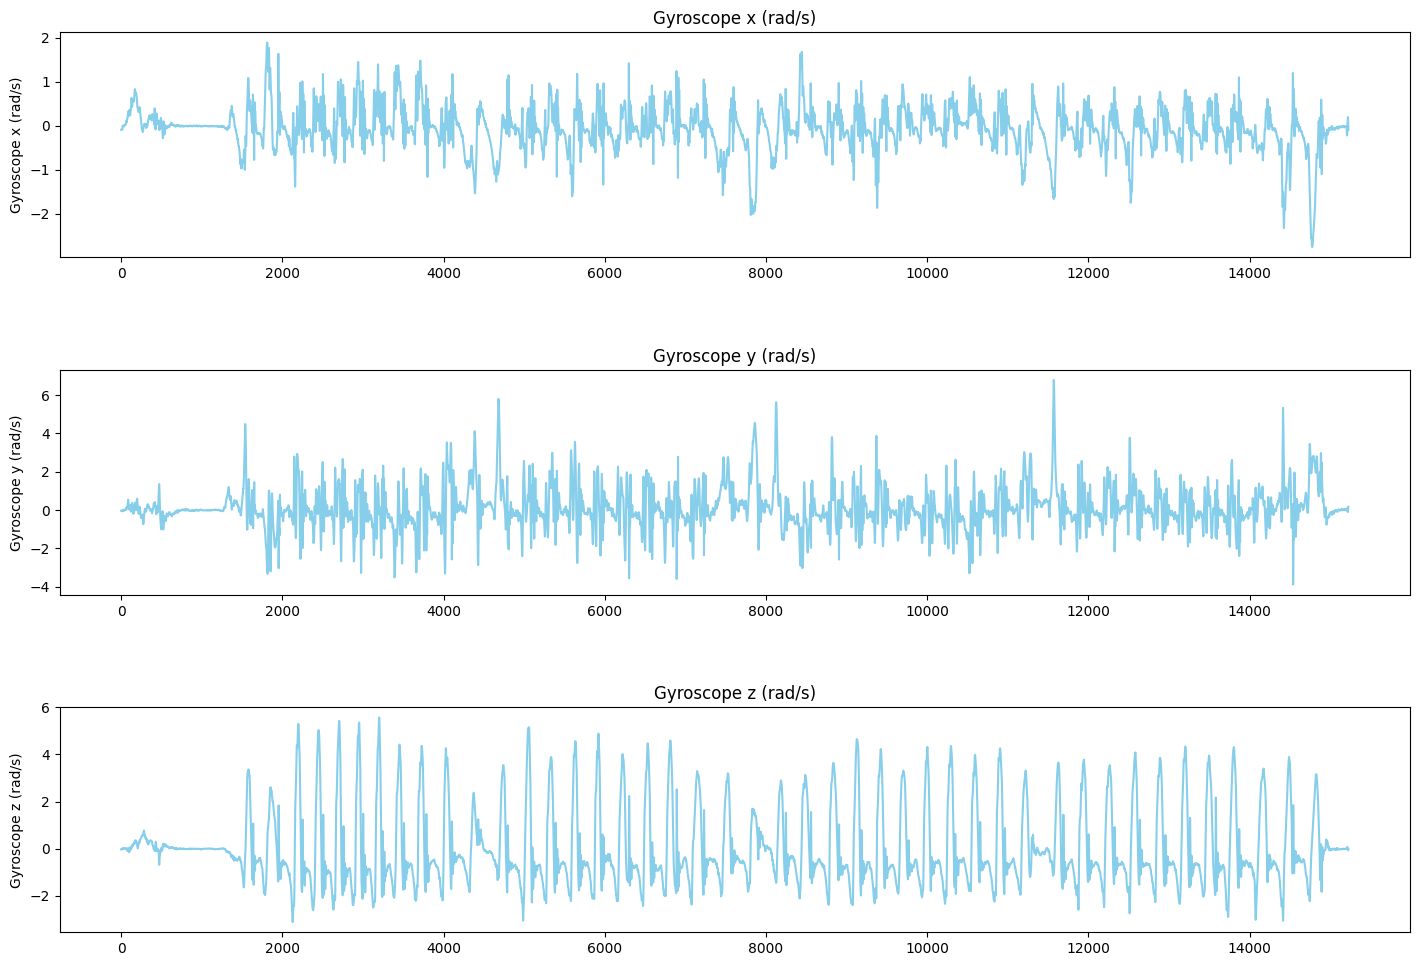

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15, 10)
for i in range(len(df_gyro_num)):
  plt.subplot(3,1,i+1)
  sns.lineplot(df_gyro[df_gyro_num[i]], color='skyblue')
  plt.title(f'{df_gyro_num[i]}')
  plt.subplots_adjust(left=0.1,
    bottom=0.1,
    right=1,
    top=1,
    wspace=0.1,
    hspace=0.5)
plt.show()   

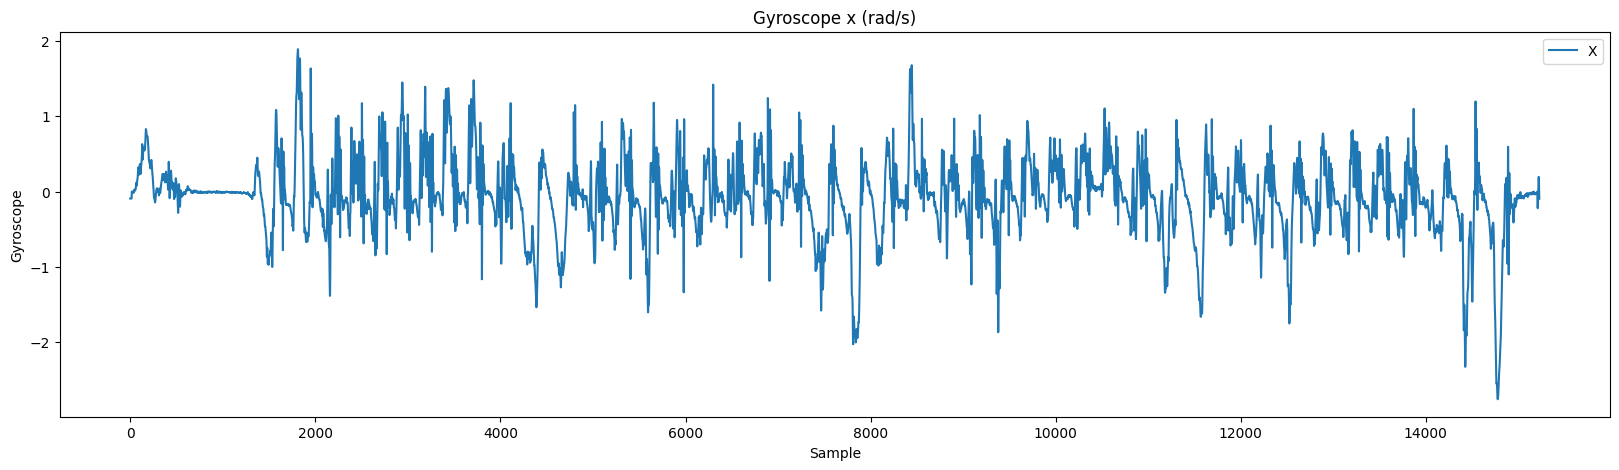

In [ ]:
# Plot raw data
plt.figure(figsize=(20, 5))
plt.plot(df_gyro['Gyroscope x (rad/s)'], label='X')
plt.title('Gyroscope x (rad/s)')
plt.xlabel('Sample')
plt.ylabel('Gyroscope')
plt.legend()
plt.show()

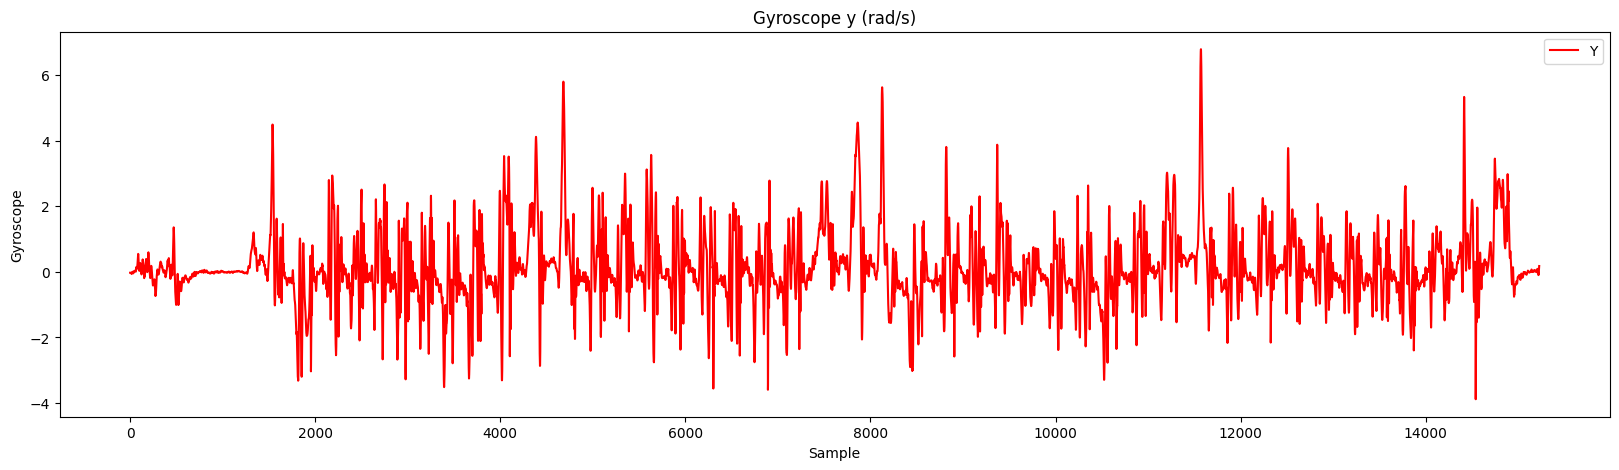

In [ ]:
# Plot raw data
plt.figure(figsize=(20, 5))
plt.plot(df_gyro['Gyroscope y (rad/s)'], label='Y', color='red')
plt.title('Gyroscope y (rad/s)')
plt.xlabel('Sample')
plt.ylabel('Gyroscope')
plt.legend()
plt.show()

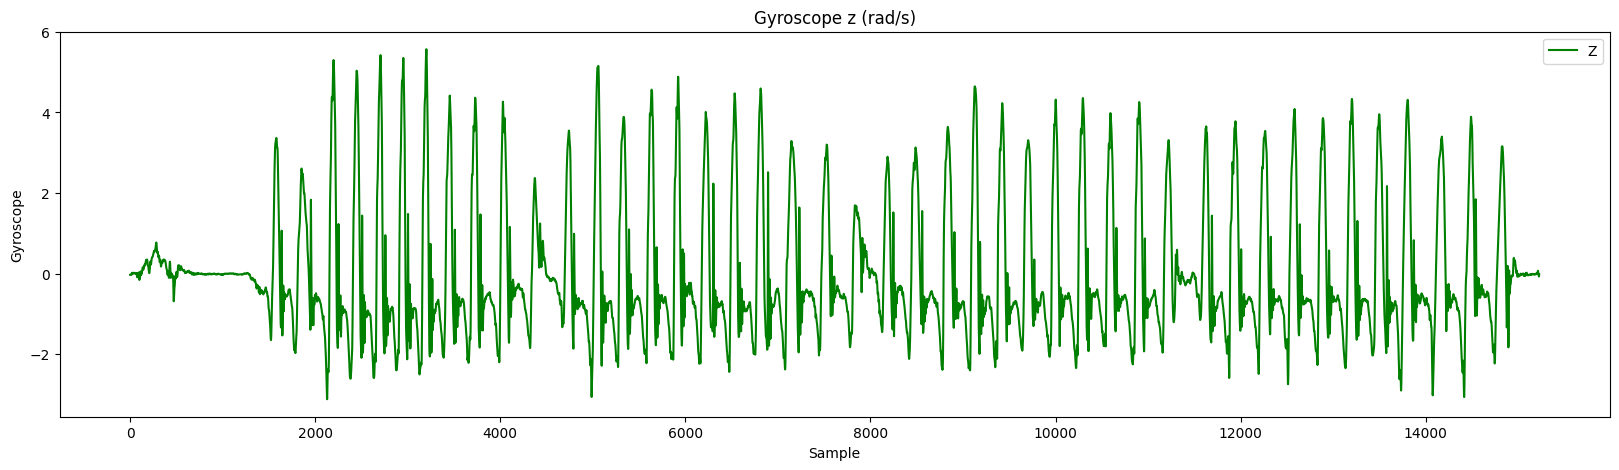

In [ ]:
# Plot raw data
plt.figure(figsize=(20, 5))
plt.plot(df_gyro['Gyroscope z (rad/s)'], label='Z', color='green')
plt.title('Gyroscope z (rad/s)')
plt.xlabel('Sample')
plt.ylabel('Gyroscope')
plt.legend()
plt.show()

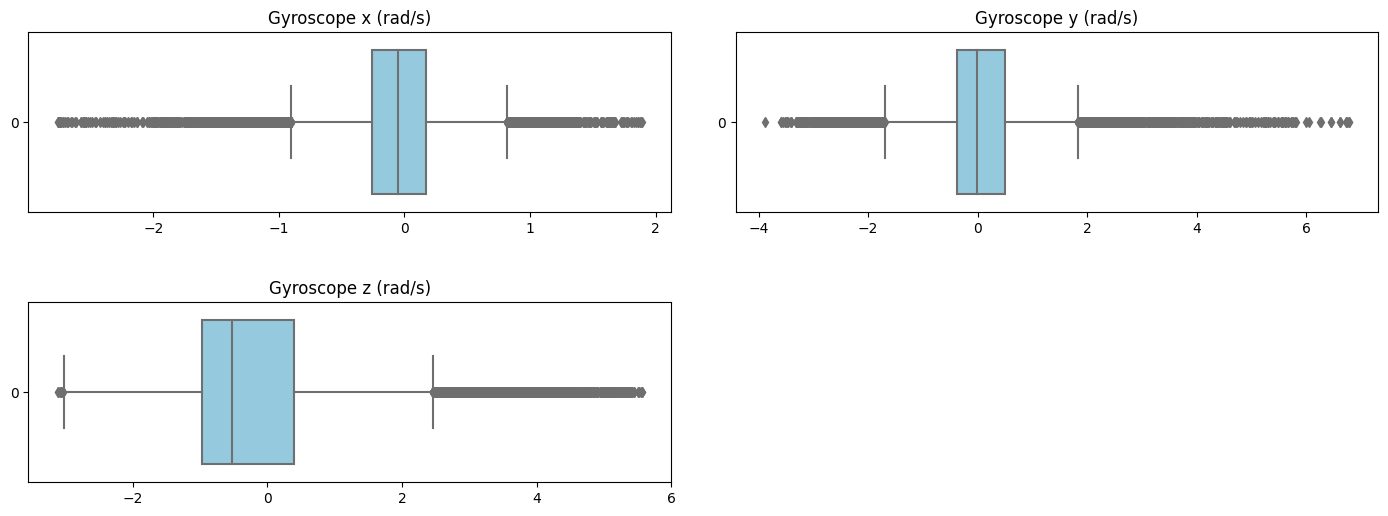

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15, 5)
for i in range(len(df_gyro_num)):
  plt.subplot(2,2,i+1)
  sns.boxplot(df_gyro[df_gyro_num[i]], orient='h', color='skyblue')
  plt.title(f'{df_gyro_num[i]}')
  plt.subplots_adjust(left=0.1,
    bottom=0.1,
    right=1,
    top=1,
    wspace=0.1,
    hspace=0.5)
plt.show()   

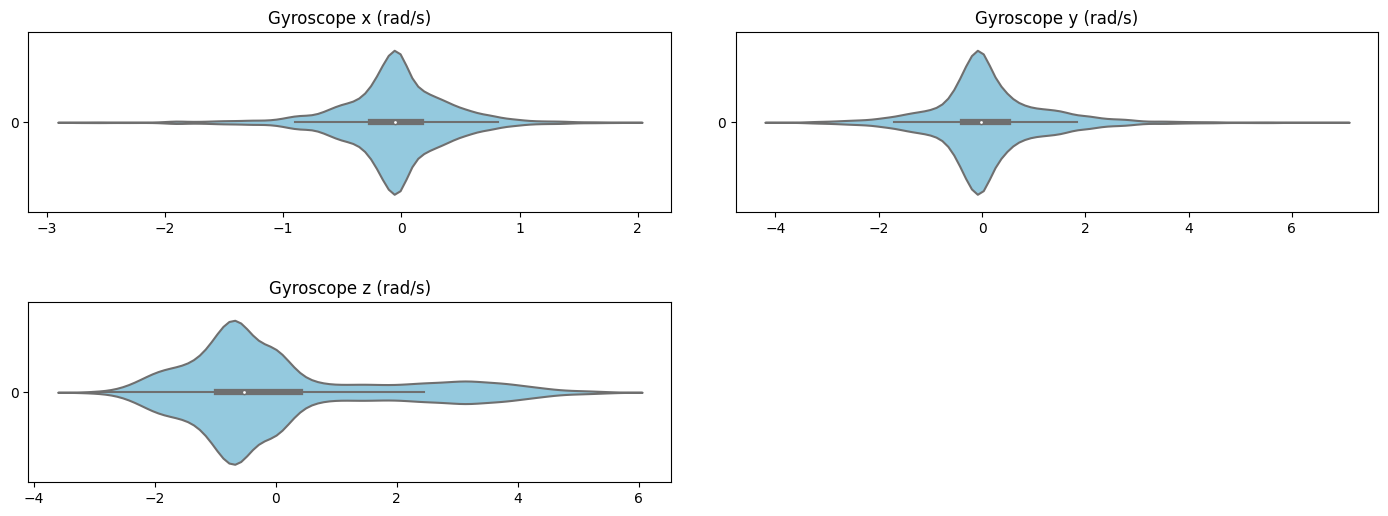

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15, 5)
for i in range(len(df_gyro_num)):
  plt.subplot(2,2,i+1)
  sns.violinplot(df_gyro[df_gyro_num[i]], orient='h', color='skyblue')
  plt.title(f'{df_gyro_num[i]}')
  plt.subplots_adjust(left=0.1,
    bottom=0.1,
    right=1,
    top=1,
    wspace=0.1,
    hspace=0.5)
plt.show()

# **Accelerometer Degree for Knee Flexion**

**Arc Tangent**

In [ ]:
print(len(df_accel))

7612


In [ ]:
df_accel.dtypes

Time (s)                         float64
Linear Acceleration x (m/s^2)    float64
Linear Acceleration y (m/s^2)    float64
Linear Acceleration z (m/s^2)    float64
dtype: object

In [ ]:
'''
knee_flex = []
for i in range(len(df_accel)):
  knee_flex.append(df_accel['Gyroscope z (rad/s)'][i] / (math.sqrt(df_accel['Gyroscope y (rad/s)'][i]**2 + df_accel['Gyroscope x (rad/s)'][i]**2)))
'''

# konversi kolom 'Linear Acceleration x (m/s^2)' dan 'Linear Acceleration y (m/s^2)' menjadi tipe data float
acc_X = df_accel['Linear Acceleration x (m/s^2)'].apply(lambda x: float(x))
acc_Y = df_accel['Linear Acceleration y (m/s^2)'].apply(lambda x: float(x))

# hitung nilai accel_z menggunakan math.atan2 pada setiap elemen Series dari acc_X dan acc_Y
df_accel['accel_z'] = acc_X.combine(acc_Y, lambda x, y: math.atan2(x, y))

In [ ]:
df_accel['accel_z']

0       2.749707
1      -2.223881
2      -1.864101
3      -2.077212
4      -1.998988
          ...   
7607    2.140213
7608    1.667686
7609    1.251170
7610   -0.056584
7611   -0.862041
Name: accel_z, Length: 7612, dtype: float64

# **Comparation Between Accelerometer Degree and Yaw Gyro / Z Gyro**

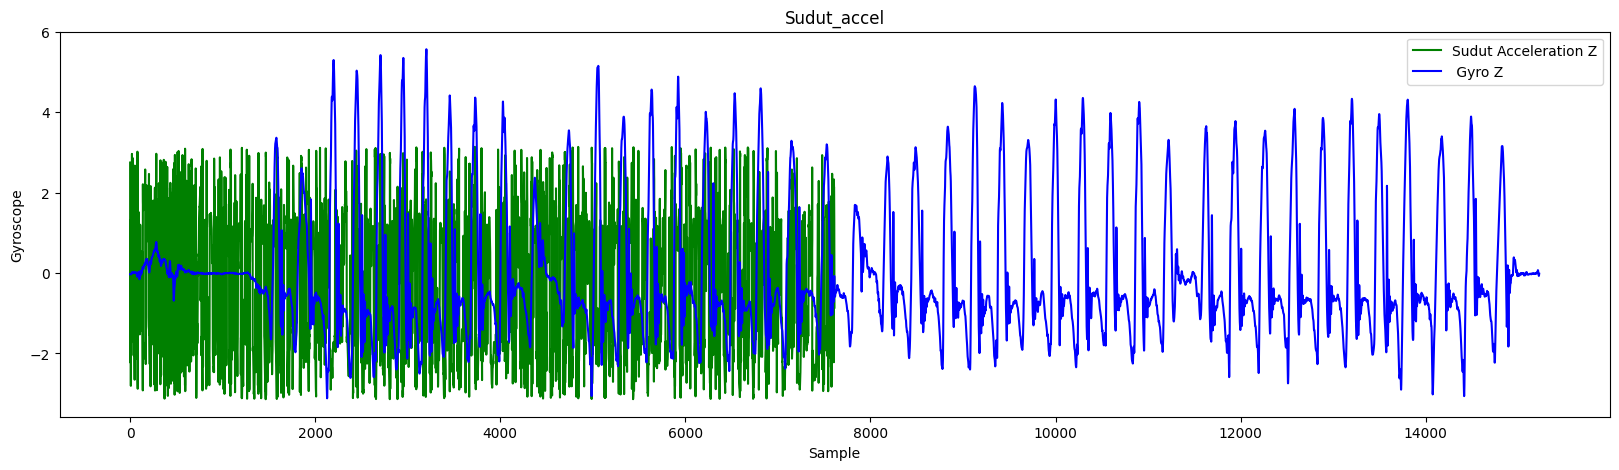

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(df_accel['accel_z'], label='Sudut Acceleration Z', color='green')
plt.plot(df_gyro['Gyroscope z (rad/s)'], label=' Gyro Z', color='blue')
plt.title('Sudut_accel')
plt.xlabel('Sample')
plt.ylabel('Gyroscope')
plt.legend()
plt.show()

# **Complementary Filter for Knee Flexion**

In [ ]:
dt = 0.01 # waktu sampling
alpha = 0.98 # konstanta filter komplementer

gyroAngle_z = df_gyro['Gyroscope z (rad/s)'] * dt
gaitAngle = (gyroAngle_z * alpha) + (df_accel['accel_z'] * 1 - alpha)

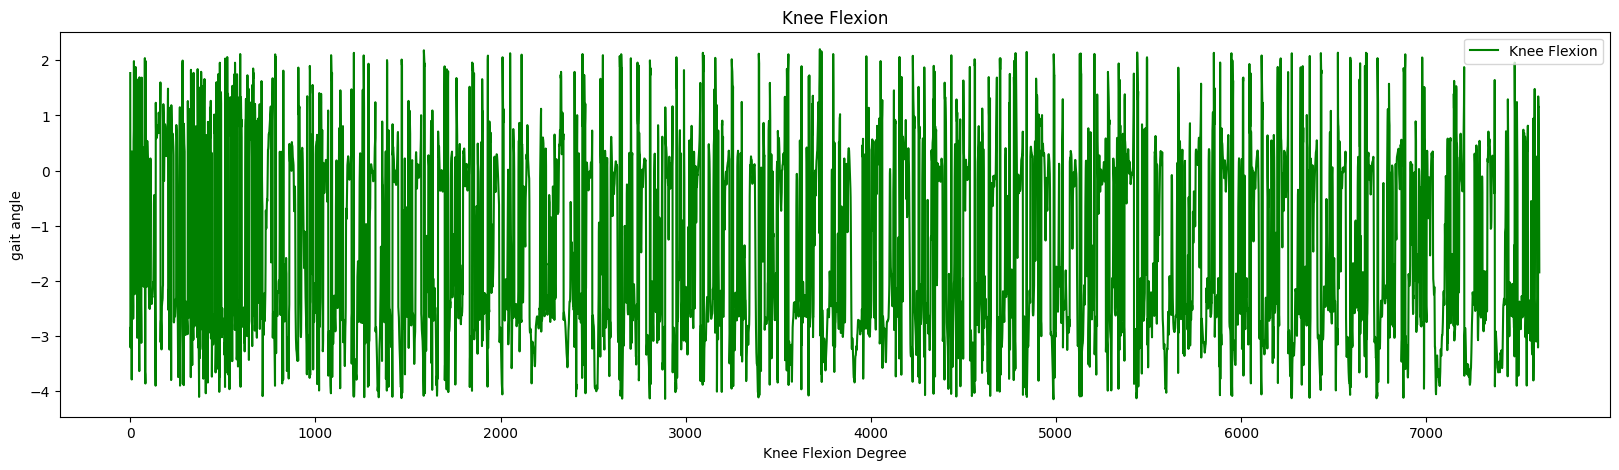

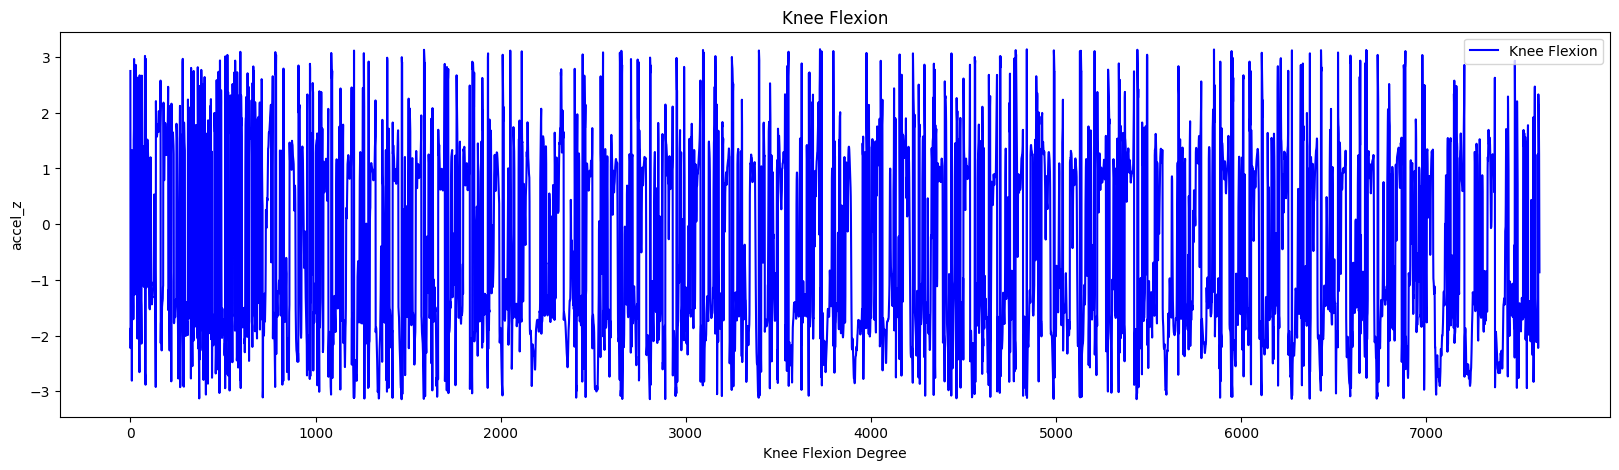

In [ ]:
# Plot Gait Angle
plt.figure(figsize=(20, 5))
plt.plot(gaitAngle, label='Knee Flexion', color='green')
plt.title('Knee Flexion')
plt.xlabel('Knee Flexion Degree')
plt.ylabel('gait angle')
plt.legend()
plt.show()

# Plot Gait Angle
plt.figure(figsize=(20, 5))
plt.plot(df_accel['accel_z'], label='Knee Flexion', color='blue')
plt.title('Knee Flexion')
plt.xlabel('Knee Flexion Degree')
plt.ylabel('accel_z')
plt.legend()
plt.show()

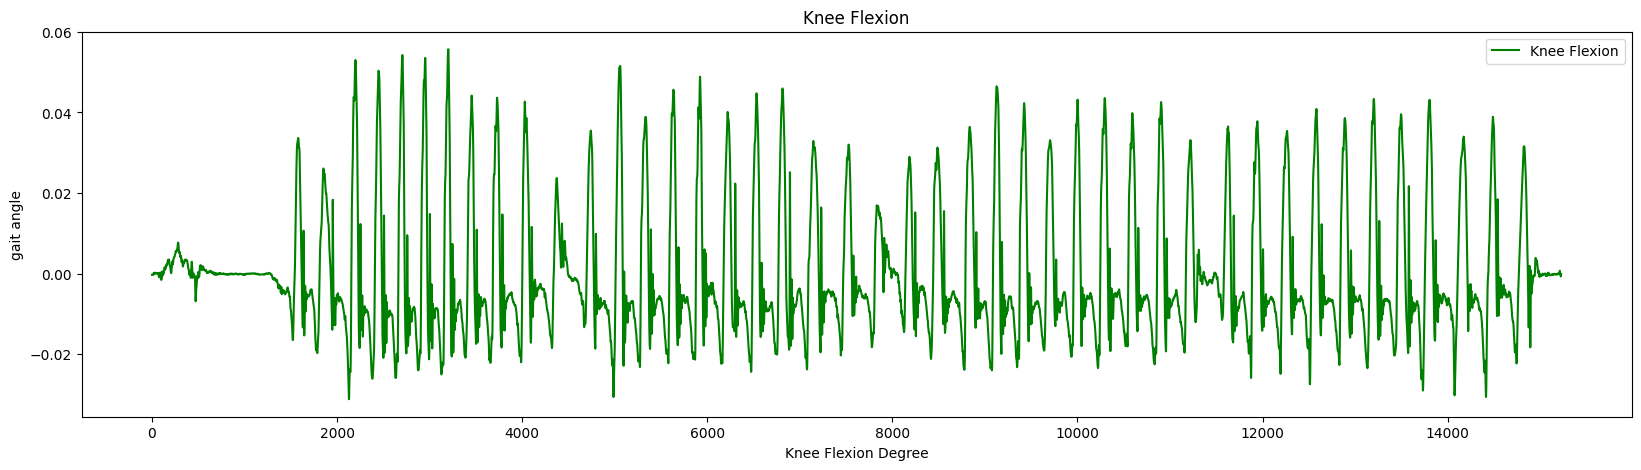

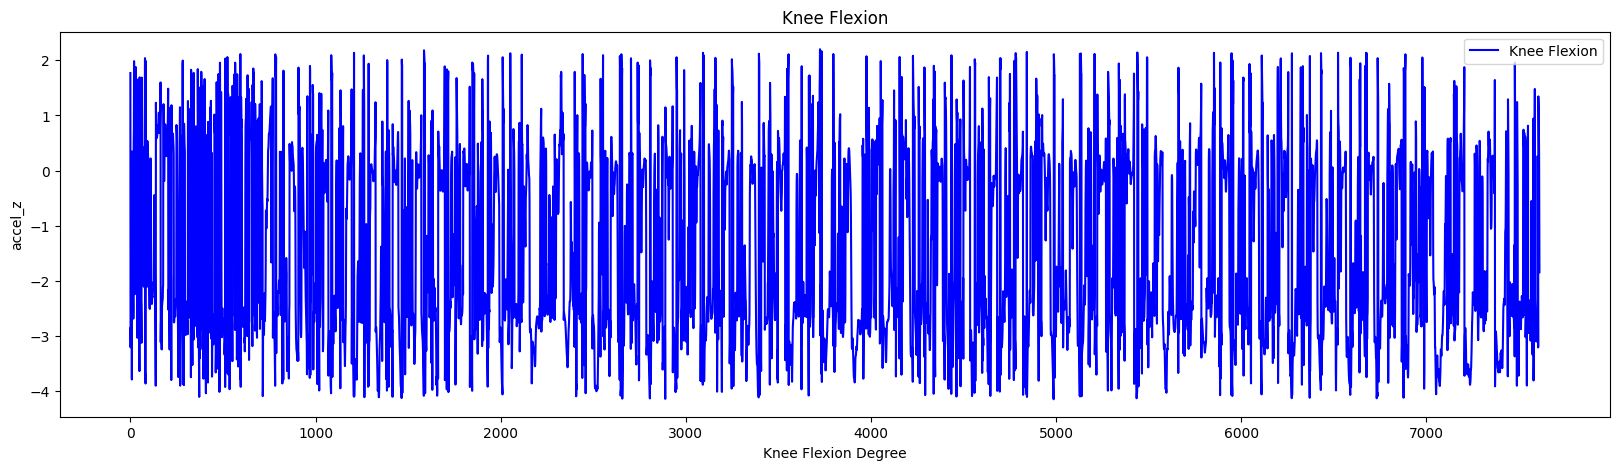

In [ ]:
# Plot Gait Angle
plt.figure(figsize=(20, 5))
plt.plot(gyroAngle_z, label='Knee Flexion', color='green')
plt.title('Knee Flexion')
plt.xlabel('Knee Flexion Degree')
plt.ylabel('gait angle')
plt.legend()
plt.show()

# Plot Gait Angle
plt.figure(figsize=(20, 5))
plt.plot(gaitAngle, label='Knee Flexion', color='blue')
plt.title('Knee Flexion')
plt.xlabel('Knee Flexion Degree')
plt.ylabel('accel_z')
plt.legend()
plt.show()